In [1]:
def taylor_exp(n,x):
    res = 1.0
    expx = 1
    kbang = 1
    for k in range(1, n + 1):
        expx *= x
        kbang *= k
        res += expx / kbang
    return res

print(taylor_exp(30, 1))

2.7182818284590455


In [2]:
import numpy as np

def taylor_exp_vec(n, x):
    a = [1 / i for i in range(1, n)]
    a = np.cumprod(a)
    a = a[::-1]
    a = np.append(a, 1)
    res = np.polyval(a, x)
    return res

print(taylor_exp_vec(30, 1))

2.71828182846


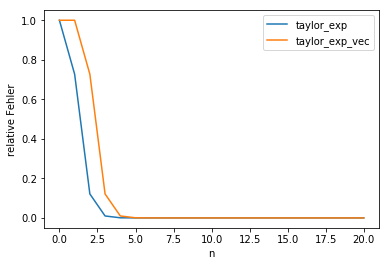

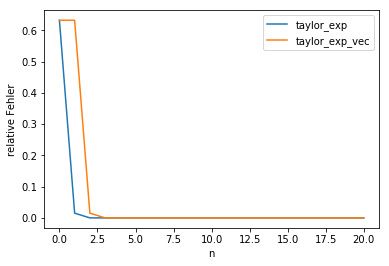

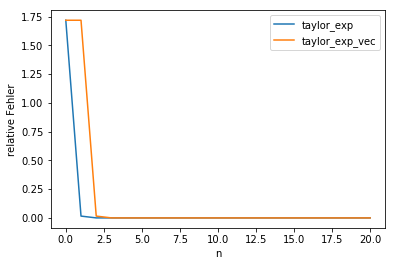

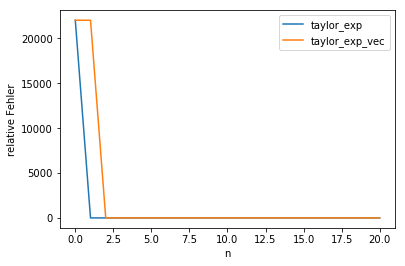

In [11]:
import math
import matplotlib.pyplot as plt


for x in [10.0, 1.0, -1.0, -10.0]:
    y = math.exp(x)
    f1 = [] # Fehler von taylor_exp
    f2 = [] # Fehler von taylor_exp_vec
    for n in range(0, 21):
        f1.append(np.abs(taylor_exp(n, x) - y) / y)
        f2.append(np.abs(taylor_exp_vec(n, x) - y) / y)
    plt.plot([i for i in range(0, 21)], f1, label = 'taylor_exp')
    plt.plot([i for i in range(0, 21)], f2, label = 'taylor_exp_vec')
    plt.xlabel("n")
    plt.ylabel("relative Fehler")
    plt.legend()
    plt.show()

# F： Warum verhält sich die Approximation schlecht für negative Argumente?
# A： Weil wenn |x| ist groß, ist der entwickelte Term mit großer Potenz ziemlich groß und damit wird die Fehler 
#     wegen Rundungsfehler groß.

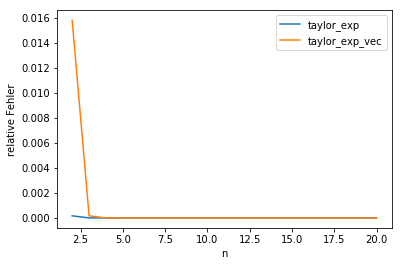

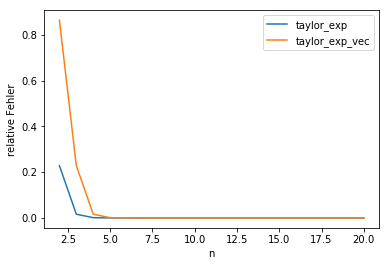

In [15]:
def taylor_exp(n,x):
    res = 1.0
    expx = 1
    kbang = 1
    for k in range(1, n + 1):
        expx *= x / 32 # beschränkt die Potenzzahl
        kbang *= k
        res += expx / kbang
    res = res**32
    return res

def taylor_exp_vec(n, x):
    a = [1 / i for i in range(1, n)]
    a = np.cumprod(a)
    a = a[::-1]
    a = np.append(a, 1)
    res = np.polyval(a, x / 32)
    res = res**32
    return res

for x in [-1.0, -10.0]:
    y = math.exp(x)
    f1 = [] # Fehler von taylor_exp
    f2 = [] # Fehler von taylor_exp_vec
    for n in range(2, 21): # Die relative Fehler wird viel kleiner nach 2 Iterationen.
        f1.append(np.abs(taylor_exp(n, x) - y) / y)
        f2.append(np.abs(taylor_exp_vec(n, x) - y) / y)
    plt.plot([i for i in range(2, 21)], f1, label = 'taylor_exp')
    plt.plot([i for i in range(2, 21)], f2, label = 'taylor_exp_vec')
    plt.xlabel("n")
    plt.ylabel("relative Fehler")
    plt.legend()
    plt.show()
